In [1]:
from PIL import Image
import numpy as np

In [2]:
group_num = 25
variant_count = 10
variant_num = (group_num - 1) % variant_count + 1
variant_num

5

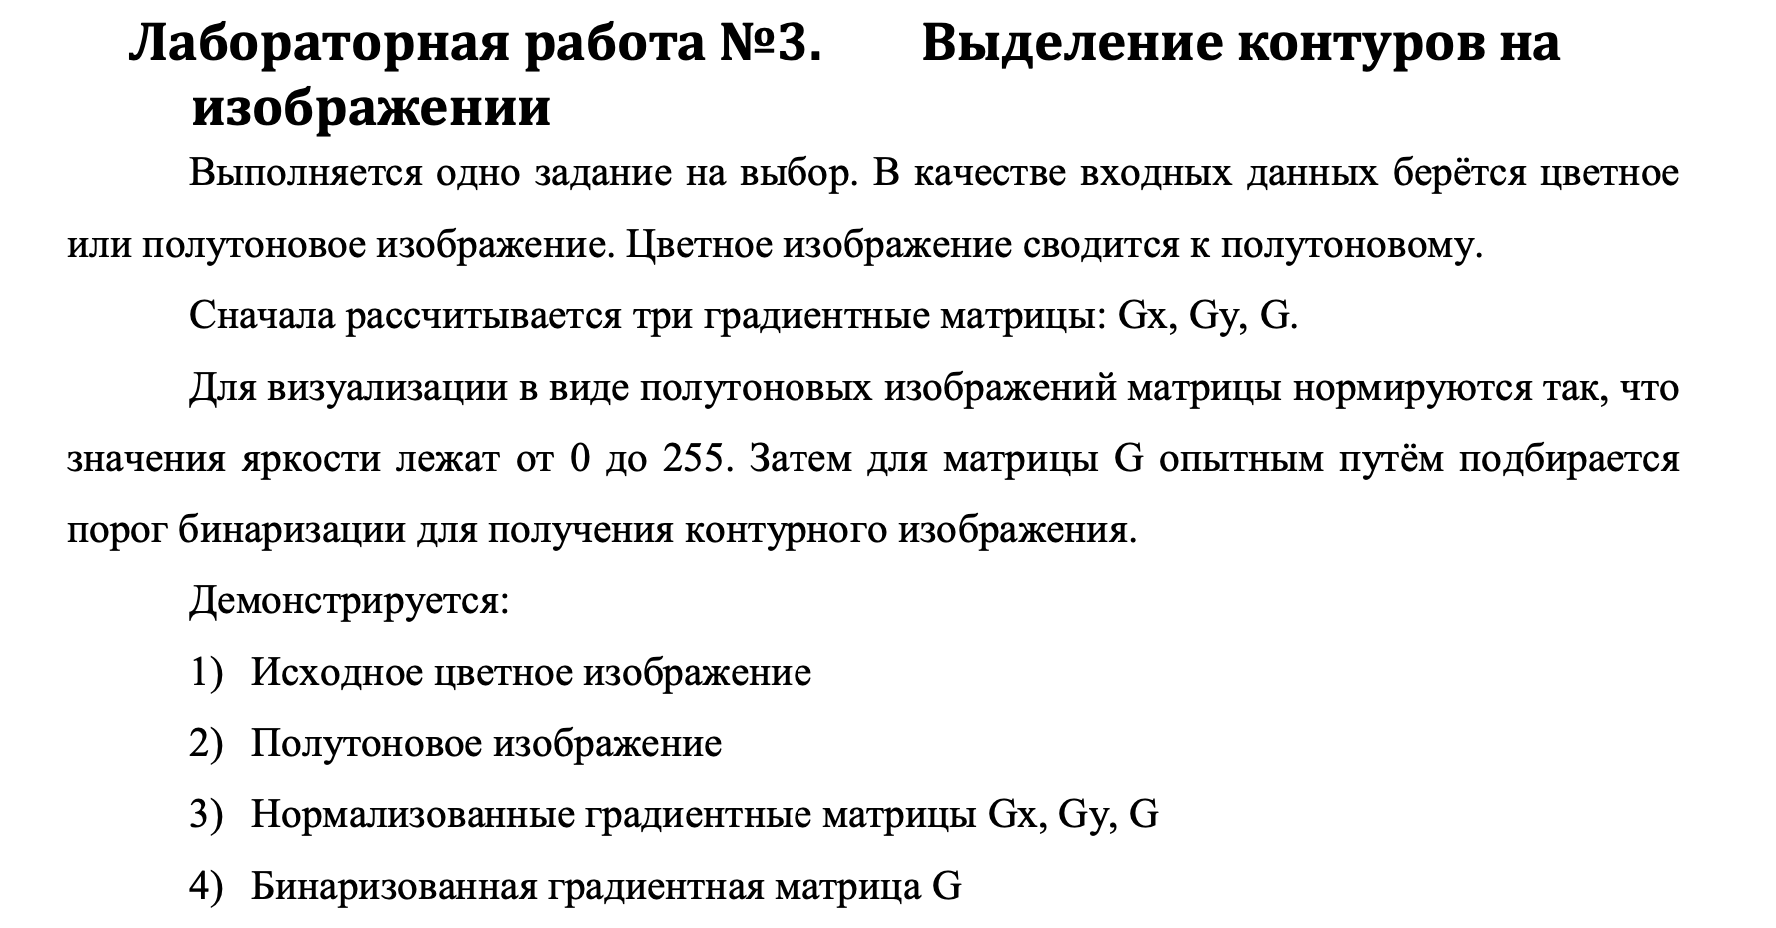

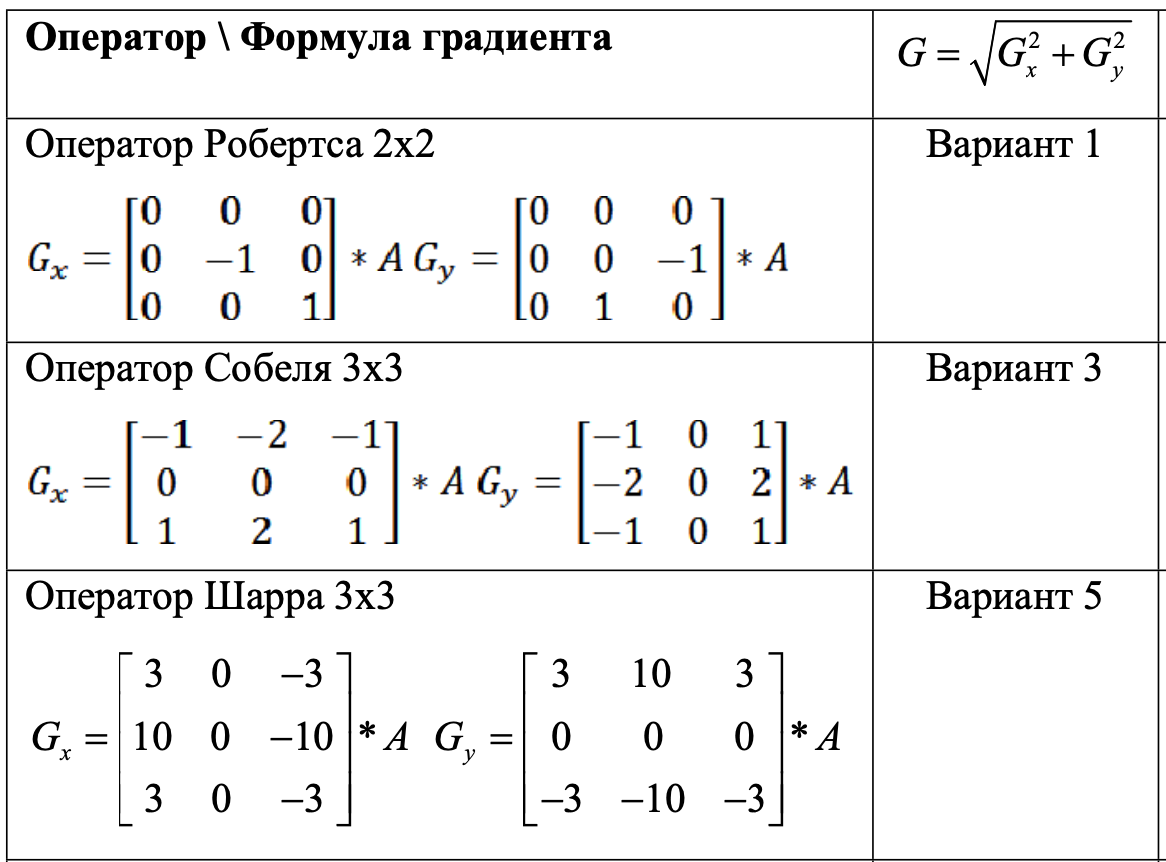

#### План реализации  
1. Перенести функцию grayscale в ноутбук
2. Загрузка изображения и приведение к grayscale
3. Выбираем окно , как во всех предыдущих лабах с window size = 3 для моего варианта и получается подсчитываем Gx (это получается перемножение оператора на окно и потом вычисление суммы матрицы), Gy , G = sqrt (Gx^2 + Gy^2) и заносим в матрицу G_matrix значение в x,y позицию значение G. Добавить в функцию возможность добавления оператора и указания окна для оператора.
4. Нормализуем матрицу G: находим максимальный элемент матрицы, после этого по формуле: G_new(x,y) = G_matrix(x,y) / max_el(G_matrix) * 255
5. Создаем пороговую матрицу T размером с G_new и значения например 155 (опытным путем надо определить) и дальше делаем итоговую матрицу G_new > T , которая будет бинарная и после этого переводим эту бинарную матрицу в диапозон значений 0..255 , умножив на 255, как в 1 лабе

In [3]:
def photoshop_grayscale(image):
    result = Image.new('L', (image.width, image.height))

    for x in range(result.width):
        for y in range(result.height):
            pixel = image.getpixel((x, y))
            new_pixel = int(round(pixel[0] * 0.3 + pixel[1] * 0.59 + pixel[2] * 0.11))
            result.putpixel((x, y), new_pixel)

    return result

In [5]:
butterflies = Image.open('butterflies.png')

In [6]:
butterflies_grayscaled = photoshop_grayscale(butterflies)

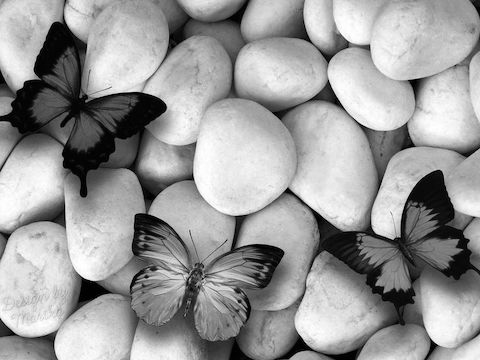

In [7]:
display(butterflies_grayscaled)

In [ ]:
def get_window_matrix(array, window_size, i, j):
    
    i_min = max(i - window_size // 2, 0)
    i_max = min(i + window_size // 2, height - 1)
    j_min = max(j - window_size // 2, 0)
    j_max = min(j + window_size // 2, width - 1)

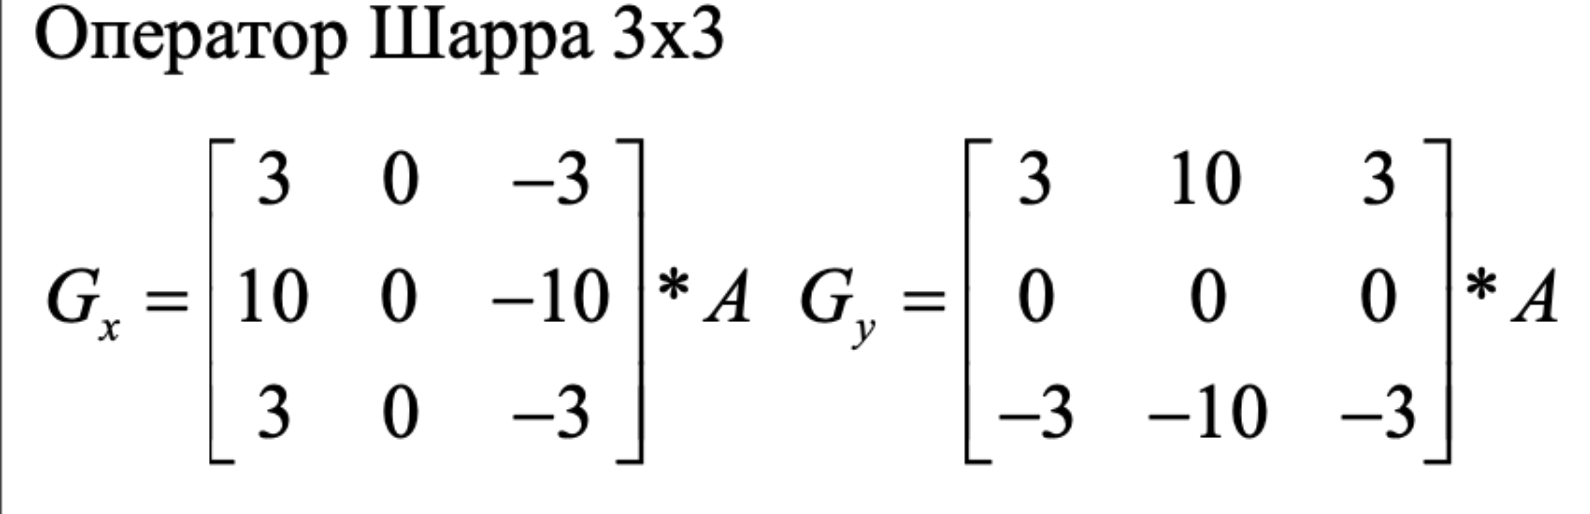

In [20]:
operator_sharra_x = np.array([[ 3,  0, -3], 
                              [10,  0,-10],
                              [ 3,  0, -3]])
operator_sharra_y = np.array([[ 3, 10,  3], 
                              [ 0,  0,  0],
                              [-3,-10, -3]])

In [152]:
def contour_selection(image, operator_x, operator_y, window_size):
    width, height = image.size
    
    gray_arr = np.asarray(image, dtype=np.uint8)
    
    G_x_matrix = np.zeros(shape=(height, width))
    G_y_matrix = np.zeros(shape=(height, width))
    G_matrix = np.zeros(shape=(height, width))
    
    # Adding zeroes on perimeter of matrix
    padded_gray_arr = np.pad(gray_arr, ((1, 1), (1, 1)), mode='constant') 
    for i in range(1, height+1): 
        for j in range(1, width+1): 
            i_min = max(i - window_size // 2, 0)
            i_max = min(i + window_size // 2, height+1)
            j_min = max(j - window_size // 2, 0)
            j_max = min(j + window_size // 2, width+1)
            
            window_matrix = padded_gray_arr[i_min:i_max+1, j_min:j_max+1]
            
            G_x = np.sum(operator_x * window_matrix)
            G_y = np.sum(operator_y * window_matrix)
            G = np.sqrt(G_x ** 2 + G_y ** 2)
            
            G_x_matrix[i-1, j-1] = int(round(G_x))
            G_y_matrix[i-1, j-1] = int(round(G_y))
            G_matrix[i-1, j-1] = int(round(G))
    
    G_x_matrix_normalized = G_x_matrix / np.max(G_x_matrix) * 255
    
    G_normalized = G_matrix / np.max(G_matrix) * 255
    print(G_normalized.astype(np.uint8))
#     return Image.fromarray(G_normalized, mode='')

In [153]:
contour_selection(butterflies_grayscaled, operator_sharra_x, operator_sharra_y, 3)

[[162 136 129 ...  20  20  25]
 [134  20   5 ...   4   1  22]
 [132  14  20 ...   7   7  26]
 ...
 [159  12  10 ...   2   5 217]
 [165  14  13 ...   5   6 220]
 [194 163 161 ... 218 220 255]]


In [42]:
arr = np.array([[1,2], [3,4]])
arr

array([[1, 2],
       [3, 4]])

In [60]:
padded_arr = np.pad(arr, ((1, 1), (1, 1)), mode='constant' , constant_values= 0)
padded_arr

array([[0, 0, 0, 0],
       [0, 1, 2, 0],
       [0, 3, 4, 0],
       [0, 0, 0, 0]])

In [44]:
width, height = img.size

In [48]:
new_arr = np.zeros((height+2, width+2))

In [49]:
new_arr.shape

(362, 482)

In [ ]:
def filtration(image):
    width, height = image.size
    
    gray_arr = np.asarray(image, dtype=np.uint8)
    
    # Adding zeroes on perimeter of matrix
    padded_gray_arr = np.pad(gray_arr, ((1, 1), (1, 1)), mode='constant') 
    
    result = Image.new('L', (image.width, image.height))
    
    window_size = 3
    for i in range(height):
        for j in range(width):
            i_min = max(i - window_size // 2, 0)
            i_max = min(i + window_size // 2, height - 1)
            j_min = max(j - window_size // 2, 0)
            j_max = min(j + window_size // 2, width - 1)
            S = (i_max - i_min + 1) * (j_max - j_min + 1)

            window_sum = np.sum(gray_arr[i_min:i_max+1, j_min:j_max+1])
            new_pixel = int(round(window_sum / S))
            
            result.putpixel((j, i), new_pixel)
            
    return result